### Dependencies

In [ ]:
!pip install sklearn

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

### MNIST Dataset

In [2]:
# Loading the dataset 
full_X, full_y = fetch_openml('mnist_784',  version=1, return_X_y=True, as_frame=False)

# Take only "0" and "1" 
mask  = (full_y == '0') | (full_y == '1')
y = full_y[mask].astype(int)
X = full_X[mask]

# All pixels, which > 255/2 replace with 1 and which < 255/2 replace with 0
condition = (X > 255./2)
X = np.where(condition, 1, 0)

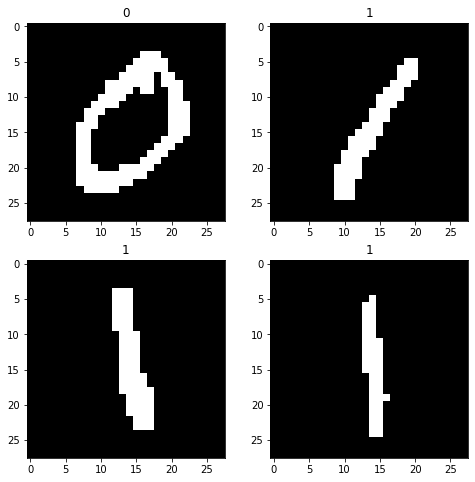

In [3]:
# Visualize images and its labels
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(X[0].reshape((28, 28)), cmap='gray')
ax[0, 0].set_title(y[0])
ax[0, 1].imshow(X[1].reshape((28, 28)), cmap='gray')
ax[0, 1].set_title(y[1])
ax[1, 0].imshow(X[2].reshape((28, 28)), cmap='gray')
ax[1, 0].set_title(y[2])
ax[1, 1].imshow(X[3].reshape((28, 28)), cmap='gray')
ax[1, 1].set_title(y[3])

plt.show()

### EM model

**Important Note:** Since EM is algorithm for unsuperised learning it may swap labels, but still separate them well. It depends on first image in the set, so may vary in different runs if you will randomly shuffle the dataset. In order to use `accuracy` metric I display both `accuracy` and `1 - accuracy`. The bigger one will depict real performance of the algorithm

In [4]:
# Importing model
from models.em_model import EM

# Initialize EM model with default settings
em = EM()

# Obtaining predictions on training set
prediction = em.fit_predict(X)

# Computing accuracy since we have balanced classes
accuracy = sum(prediction == y)/y.shape[0]
print(f"Model accuracy: {accuracy} or {1 - accuracy}")

D:\Python\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model accuracy: 0.9951962110960758 or 0.004803788903924189


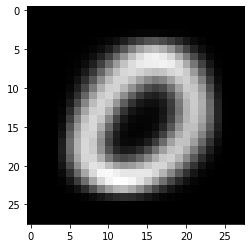

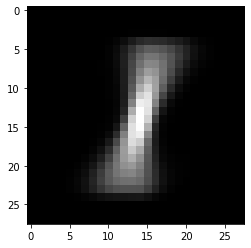

In [5]:
# Plotting p_ij_classes we will obtain "scatches" of images, belonging to a certain class
plt.imshow(em.p_ij_classes[0].reshape(28, 28), cmap='gray')
plt.show()

plt.imshow(em.p_ij_classes[1].reshape(28, 28), cmap='gray')
plt.show()